In [47]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import LabelEncoder

# !pip install --upgrade seaborn matplotlib

In [48]:
screentime = pd.read_excel("screentime.xlsx")
screentime.head()


Timestamp  1. Age: 2.  Gender :     3.  Occupation:  \
0 2024-01-09 23:48:53.653  35 - 44       Female             Student   
1 2024-01-10 00:01:26.046  25 - 34         Male  Full-time employed   
2 2024-01-10 00:44:22.886  35 - 44       Female  Full-time employed   
3 2024-01-10 00:44:33.395  35 - 44         Male  Full-time employed   
4 2024-01-10 00:53:46.821  35 - 44       Female  Full-time employed   

  4.   How aware are you of the amount of time you spend on screens in a typical day?  \
0                                     Moderate aware                                    
1                                         Very aware                                    
2                                    Extremely aware                                    
3                                     Moderate aware                                    
4                                     Moderate aware                                    

  5.   On average, how many hours per day do you spend using electronic devices with screens (e.g., smartphones, computers, tablets)?  \
0                                         5 -7 hours                                                                                    
1                                    8 or more hours                                                                                    
2                                    8 or more hours                                                                                    
3                                         5 -7 hours                                                                                    
4                                    8 or more hours                                                                                    

  6.   Which devices do you use most frequently for screen-related activities? (select up to 3)  \
0                      Smartphone, Laptop / Computer                                              
1                      Smartphone, Laptop / Computer                                              
2          Smartphone, Laptop / Computer, Television                                              
3                      Smartphone, Laptop / Computer                                              
4                      Smartphone, Laptop / Computer                                              

  7. Would you like to reduce your overall screen time?  \
0                                                Yes      
1                                                Yes      
2                                                Yes      
3                                                Yes      
4                                                Yes      

  8. What motivates you to consider reducing your screen time? (Select up to three)  \
0  Improve overall well-being, Increase productiv...                                  
1  Improve overall well-being, Increase productiv...                                  
2  Improve overall well-being, Increase productiv...                                  
3       Increase productivity, Enhance mental health                                  
4  Improve overall well-being, Increase productiv...                                  

  9. Do you find the idea of reducing your screen time challenging or difficult?  \
0                                        Challenging                               
1                                        Challenging                               
2                                        Challenging                               
3                                        Challenging                               
4                                            Neutral                               

  10.  What specific challenges or barriers do you anticipate in reducing your screen time? (Select up to three)  \
0  Social obligations, Entertainment habits, Lack...                                                               
1            Work req

In [49]:
df_screentime = screentime.copy()
df_screentime.drop('Timestamp', axis=1, inplace=True)



In [50]:

df_screentime = screentime.copy()
df_screentime.drop('Timestamp', axis=1, inplace=True)

new_columns = ['Age', 'Gender', 'Occupation', 'Awareness', 
               'Avg_Hours_per_Day', 'Device_Used', 'Desire_to_Reduce_Screen_Time',
               'Motivations_to_Reduce_Screen_Time', 'Difficulty_in_Reducing_Screen_Time',
               'Anticipated_Challenges', 'Strategies',
               'Interest_in_Resources', 'Preferred_Support_Type']

df_screentime.columns = new_columns
df_screentime.head()
df_screentime.to_excel('new_screentime.xlsx', index=False)

In [51]:
df_screentime.dtypes


Age                                   object
Gender                                object
Occupation                            object
Awareness                             object
Avg_Hours_per_Day                     object
Device_Used                           object
Desire_to_Reduce_Screen_Time          object
Motivations_to_Reduce_Screen_Time     object
Difficulty_in_Reducing_Screen_Time    object
Anticipated_Challenges                object
Strategies                            object
Interest_in_Resources                 object
Preferred_Support_Type                object
dtype: object

In [52]:
df_screentime.isnull().sum()

# after check nature of inputs, it's not neccessary to clean the data. People who is not interested in resources to help
# them reduce screentime do not give answer to the preferred support type. 


Age                                   0
Gender                                0
Occupation                            0
Awareness                             0
Avg_Hours_per_Day                     0
Device_Used                           0
Desire_to_Reduce_Screen_Time          0
Motivations_to_Reduce_Screen_Time     1
Difficulty_in_Reducing_Screen_Time    0
Anticipated_Challenges                0
Strategies                            6
Interest_in_Resources                 0
Preferred_Support_Type                8
dtype: int64

In [53]:
# Examine Demograpchic information:
# the distribution of responses in categorical variables like "Age," "Gender," and "Occupation.

age_distribution = df_screentime['Age'].value_counts()

print("\nDistribution of Age:")
print(age_distribution)



Distribution of Age:
Age
35 - 44    16
25 - 34    13
45 - 54    10
18 - 24     4
65+         2
55 - 64     1
Name: count, dtype: int64


In [8]:

gender_distribution = df_screentime['Gender'].value_counts()

print("\nDistribution of Gender:")
print(gender_distribution)


Distribution of Gender:
Gender
Female               27
Male                 18
Prefer not to say     1
Name: count, dtype: int64


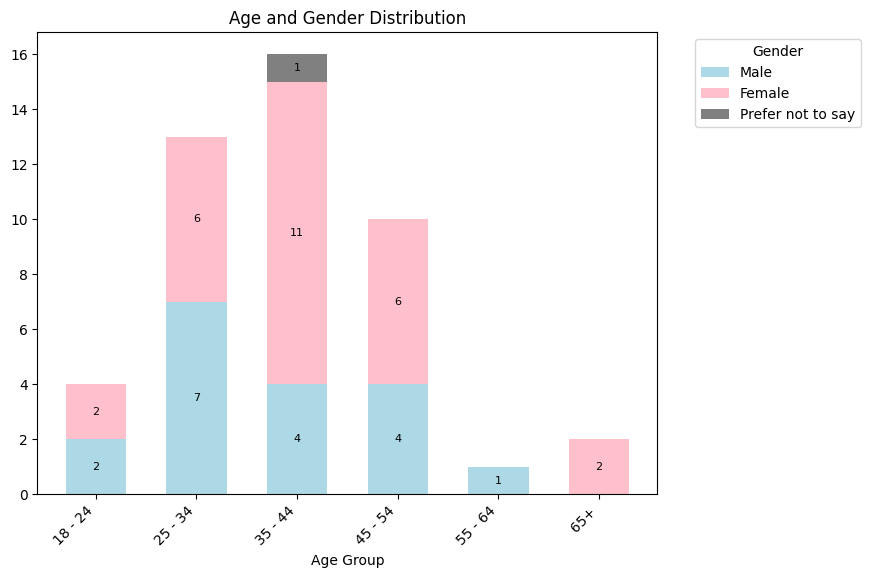

In [54]:
gender_age_counts = df_screentime.groupby(['Age', 'Gender']).size().unstack(fill_value=0)
ordered_age_groups = df_screentime['Age'].sort_values().unique()

plt.figure(figsize=(8, 6))
colors = ['lightblue', 'pink', 'gray']
bottom = [0] * len(ordered_age_groups)

for idx, gender in enumerate(['Male', 'Female', 'Prefer not to say']):
    counts = gender_age_counts[gender]
    non_zero_counts = [count if count > 0 else 0 for count in counts]
    bars = plt.bar(ordered_age_groups, non_zero_counts, bottom=bottom, label=gender, color=colors[idx], width=0.6)
    bottom = [sum(x) for x in zip(bottom, non_zero_counts)]

    for bar, count in zip(bars, non_zero_counts):
        if count > 0:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, str(int(count)),
                     ha='center', va='center', color='black', fontsize=8)

plt.title('Age and Gender Distribution')
plt.xlabel('Age Group')
plt.grid(False)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

Full-time employed: 30
Student: 6
Self-employed: 5
Retired: 3
Part-time employed: 2
Stay-at-home parent: 2


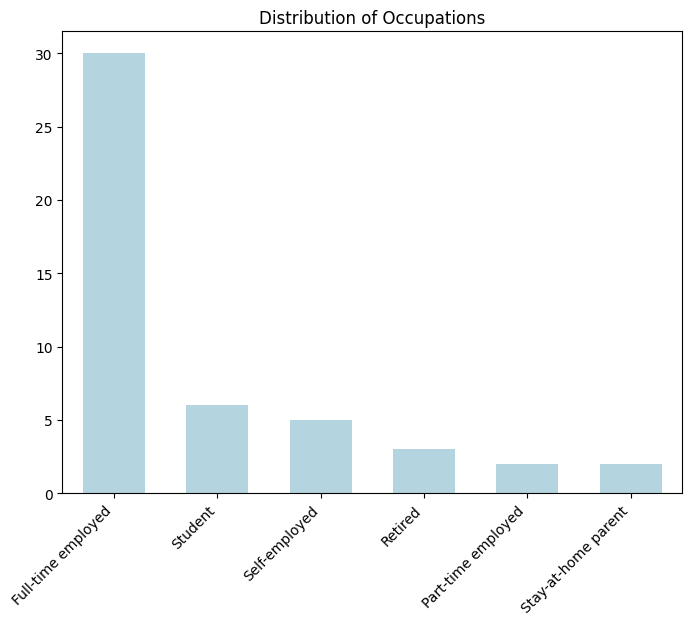

In [10]:

df_screentime['Occupation'] = df_screentime['Occupation'].str.split(', ')
df_screentime = df_screentime.explode('Occupation')


occupation_counts = df_screentime['Occupation'].value_counts()

for occupation, count in occupation_counts.items():
    print(f'{occupation}: {count}')

    
    occupation_counts = df_screentime['Occupation'].value_counts()
occupation_order = occupation_counts.index.tolist()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Occupation', data=df_screentime, color='lightblue', order=occupation_order, width=0.6)
ax.set_title('Distribution of Occupations')
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45, ha='right',fontsize =10)
plt.grid(False)
plt.show()


Student: 6
Self-employed: 5
Retired: 3
Part-time employed: 2
Stay-at-home parent: 2


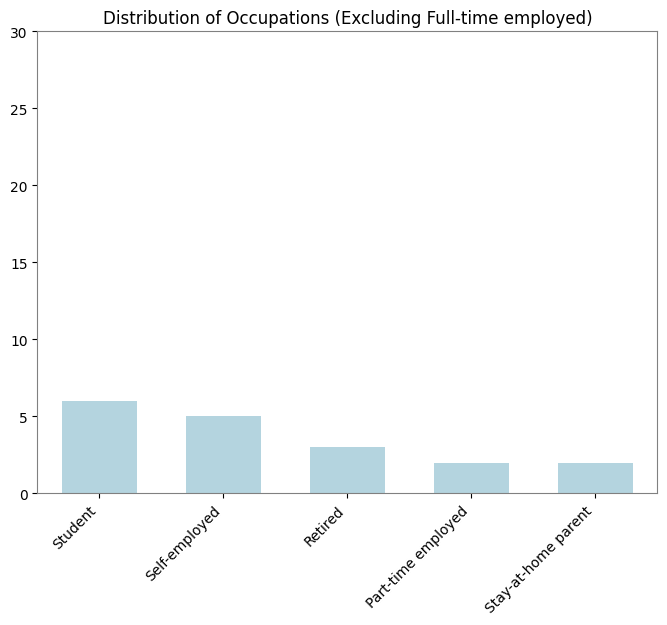

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

df_screentime['Occupation'] = df_screentime['Occupation'].str.split(', ')
df_screentime = df_screentime.explode('Occupation')

# Filter out 'Full-time employed' occupation
df_screentime_filtered = df_screentime[df_screentime['Occupation'] != 'Full-time employed']

# Get the counts for each occupation
occupation_counts = df_screentime_filtered['Occupation'].value_counts()

for occupation, count in occupation_counts.items():
    print(f'{occupation}: {count}')

# Get the order of occupations based on counts
occupation_order = occupation_counts.index.tolist()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Occupation', data=df_screentime_filtered, color='lightblue', order=occupation_order, width=0.6)
ax.set_title('Distribution of Occupations (Excluding Full-time employed)')
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(False)

# Set y-axis limit to 30
ax.set_ylim(0, 30)

# Set the border color of the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('gray')

plt.show()




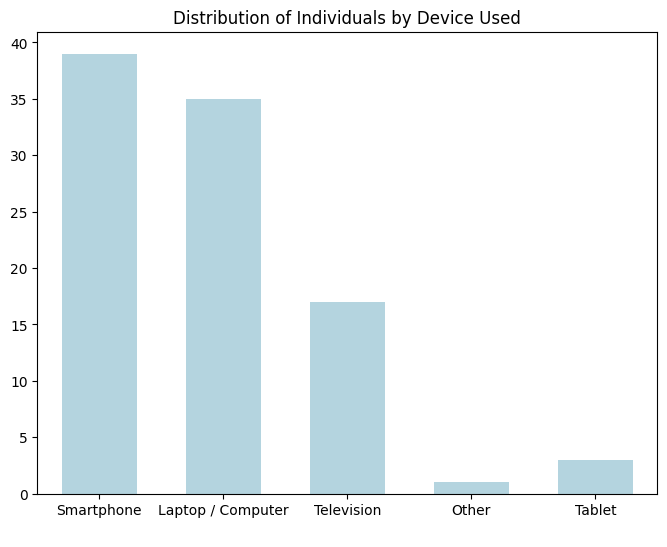

In [55]:
devices_df = df_screentime['Device_Used'].str.split(', ', expand=True)
devices_df = devices_df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
devices_df = devices_df.replace({'Other (please specify):': 'Other'})

plt.figure(figsize=(8, 6))

sns.countplot(x=devices_df.stack(), color='lightblue', linewidth=0.5, width=0.6)
plt.xlabel(' ')
plt.ylabel('')
plt.title('Distribution of Individuals by Device Used')
plt.grid(False, axis='both')
plt.show()

In [56]:
summary_stats = df_screentime.groupby('Age', observed=False)['Avg_Hours_per_Day'].describe()
summary_stats 

count unique              top freq
Age                                       
18 - 24     4      3       5 -7 hours    2
25 - 34    13      2  8 or more hours   12
35 - 44    16      4  8 or more hours    8
45 - 54    10      4  8 or more hours    4
55 - 64     1      1  8 or more hours    1
65+         2      2       5 -7 hours    1

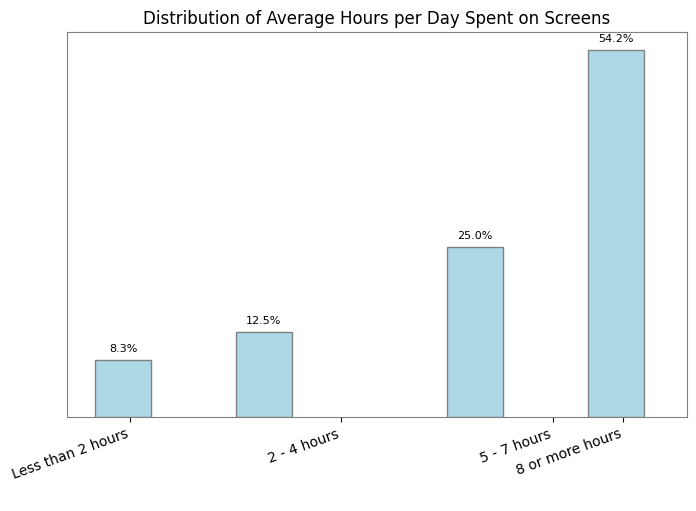

In [104]:


hours_mapping = {
    'Less than 2 hours': 1,
    '2 - 4 hours': 3,
    '5 - 7 hours': 6,
    '8 or more hours': 8
}

df_screentime['Avg_Hours_per_Day'] = df_screentime['Avg_Hours_per_Day'].str.replace('5 -7 hours', '5 - 7 hours')
df_screentime['Avg_Hours_per_Day'] = df_screentime['Avg_Hours_per_Day'].str.split(',').str[0] 
df_screentime['Avg_hours'] = df_screentime['Avg_Hours_per_Day'].map(hours_mapping)

total_samples = len(df_screentime['Avg_hours'])
percentage_values = [count / total_samples * 100 for count in counts]

plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(df_screentime['Avg_hours'], bins=[1, 3, 6, 8, 9], color='lightblue', width=0.8, align='mid', edgecolor='gray')

custom_labels = ['Less than 2 hours', '2 - 4 hours', '5 - 7 hours', '8 or more hours']
plt.xticks([1.5, 4.5, 7.5, 8.5], custom_labels, rotation=20, ha='right')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)

for percentage, patch in zip(percentage_values, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

plt.title('Distribution of Average Hours per Day Spent on Screens')
plt.xlabel(' ')
plt.ylabel('')
plt.grid(False, axis='both')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('gray')

plt.show()


/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_60686/907291866.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Age', y='Avg_hours', data=df_screentime, palette='pastel', ci=None, order=age_order, width=0.6)
/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_60686/907291866.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age', y='Avg_hours', data=df_screentime, palette='pastel', ci=None, order=age_order, width=0.6)


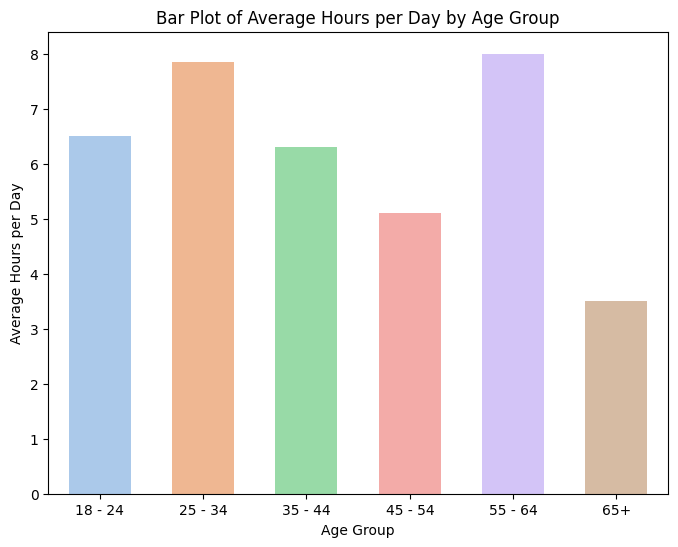

In [58]:
hours_mapping = {
    'Less than 2 hours': 1,
    '2 - 4 hours': 3,
    '5 - 7 hours': 6,
    '8 or more hours': 8
}
age_order = ['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65+']
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Age', y='Avg_hours', data=df_screentime, palette='pastel', ci=None, order=age_order, width=0.6)
ax.grid(False)

plt.title('Bar Plot of Average Hours per Day by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Day')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_screentime['Awareness_encoded'] = label_encoder.fit_transform(df_screentime['Awareness'])
correlation_coefficient = df_screentime['Awareness_encoded'].corr(df_screentime['Avg_hours'])

print(f"Correlation Coefficient: {correlation_coefficient}")

# If the coefficient is close to 1, it indicates a strong positive correlation 
# (as 'Awareness' increases, 'Avg_hours' also tends to increase).

# If the coefficient is close to -1, it indicates a strong negative correlation 
# (as 'Awareness' increases, 'Avg_hours' tends to decrease).

# If the coefficient is close to 0, it indicates a weak or no linear correlation.

"""In this case, there is a positive correlation but very weak. 
We can conclude that there is no significant correlation between awareness and average hours spent on 
screen time."""



Correlation Coefficient: 0.14094413206610623


'In this case, there is a positive correlation but very weak. \nWe can conclude that there is no significant correlation between awareness and average hours spent on \nscreen time.'

/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_20047/40158435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Age', y='Avg_hours', data=df_screentime, palette='pastel', width=0.6, order=age_order)


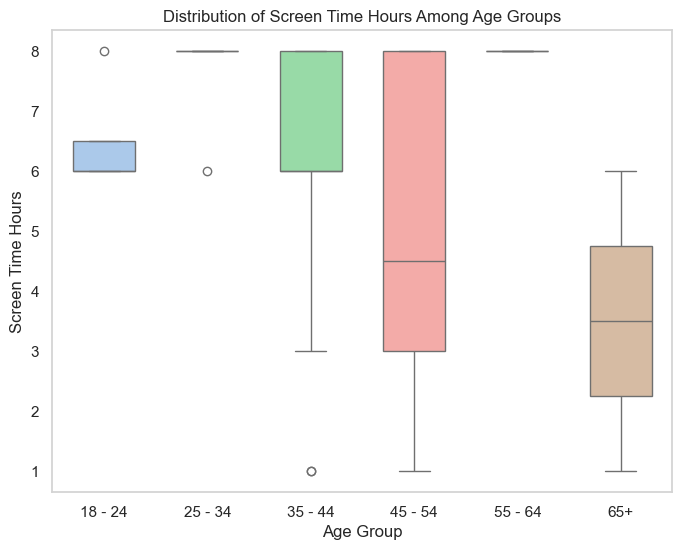

In [225]:
plt.figure(figsize=(8, 6))
age_order = ['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65+']

ax = sns.boxplot(x='Age', y='Avg_hours', data=df_screentime, palette='pastel', width=0.6, order=age_order)
ax.grid(False)
plt.title('Distribution of Screen Time Hours Among Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Screen Time Hours')

plt.show()


/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_60686/2431423924.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Occupation', y='Avg_hours', data=occupation_counts, palette='pastel', ci=None, width=0.6)
/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_60686/2431423924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Occupation', y='Avg_hours', data=occupation_counts, palette='pastel', ci=None, width=0.6)


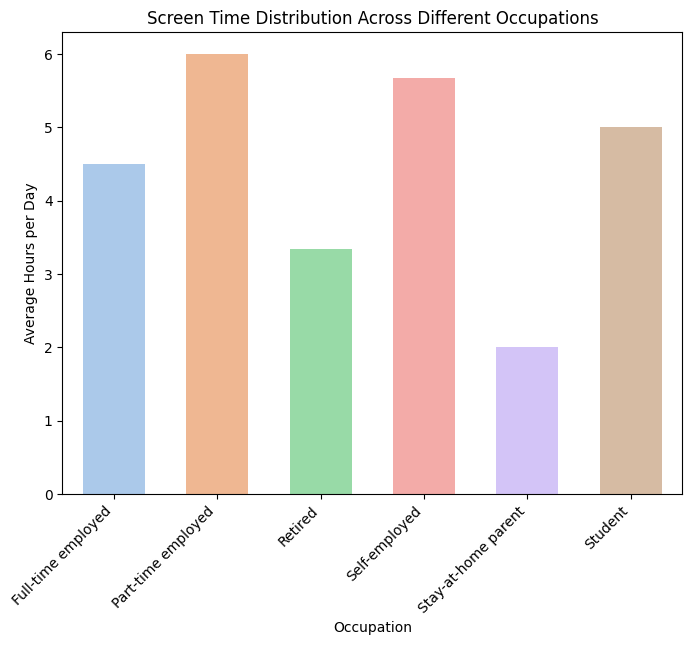

In [59]:
df_screentime['Occupation'] = df_screentime['Occupation'].str.split(', ')
df_screentime = df_screentime.explode('Occupation')
occupation_counts = df_screentime.groupby(['Occupation', 'Avg_hours']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Occupation', y='Avg_hours', data=occupation_counts, palette='pastel', ci=None, width=0.6)
ax.grid(False)

plt.title('Screen Time Distribution Across Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Average Hours per Day')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

/var/folders/q5/5zcd6_2115553r1tvx9_1vk40000gn/T/ipykernel_60686/2431440247.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Occupation', y='Avg_hours', data=df_screentime, palette='pastel', width=0.6, order=order)


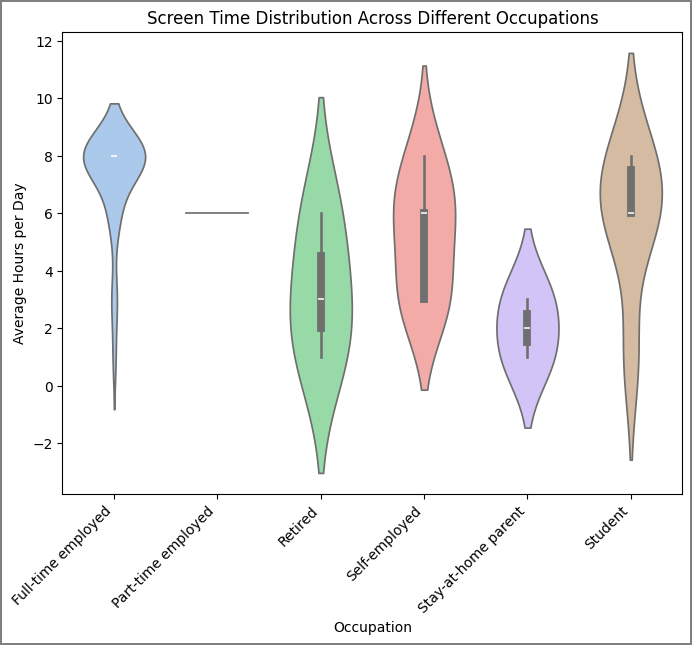

In [64]:

order = [
    'Full-time employed',
    'Part-time employed',
    'Retired',
    'Self-employed',
    'Stay-at-home parent',
    'Student'
]

plt.figure(figsize=(8, 6), edgecolor='gray', linewidth=1.5)
sns.violinplot(x='Occupation', y='Avg_hours', data=df_screentime, palette='pastel', width=0.6, order=order)

plt.title('Screen Time Distribution Across Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Average Hours per Day')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(False)

plt.show()


In [18]:
# Check association between choice of strategies and each of demographic characteristic.
# Null Hypothesis: There is no significant association demographic variables and the 
# choice of strategies to reduce screen time.

# Alternative Hypothesis = There is a significant association between demographic 
# variables  and the choice of strategies to reduce screen time.


contingency_table = pd.crosstab(df_screentime['Age'], df_screentime['Strategies'])

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')



Chi-square statistic: 59.075367647058826, p-value: 0.9115204482559106


In [19]:
contingency_table = pd.crosstab(df_screentime['Gender'], df_screentime['Strategies'])

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')


Chi-square statistic: 19.86764705882353, p-value: 0.9199422469832289


In [108]:
contingency_table = pd.crosstab(df_screentime['Occupation'], df_screentime['Strategies'])

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')


Chi-square statistic: 68.53060344827587, p-value: 0.6877054036795615


In [ ]:
"""The P-Value is higher than 5%. It suggests that there is not enought evidence to 
reject the null hypothesis (fail to reject H0).Meaning that there is no association 
between Age & Strategies, Gender & Strategies and Occupation & Strategies. 
The choice of strategies is independent of the demographic variable (age, gender, occupation).

However I would like to recheck the hypothesis. This analysis excluded “Full-Time Employed”
catergory. The decision is driven by the observation that it has the highest count, 
which could disproportionately influence the distribution of choices in strategies to 
reduce screen time. By removing this category, we aim to ensure a more balanced 
representation of other groups and prevent potential bias in our analysis of 
screen time reduction strategies. """


In [109]:

df_screentime_filtered = df_screentime[df_screentime['Occupation'] != 'Full-time employed']

contingency_table = pd.crosstab(df_screentime_filtered['Occupation'], df_screentime_filtered['Strategies'])

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')


Chi-square statistic: 25.674999999999997, p-value: 0.5909036968237458


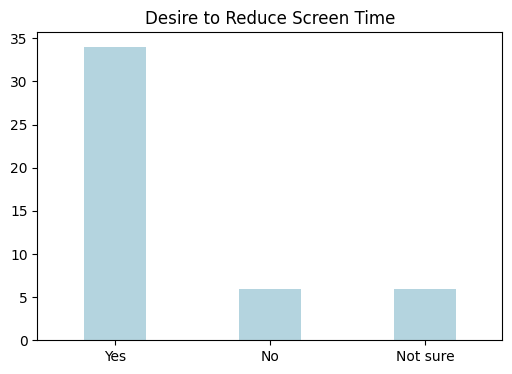

In [21]:
data= pd.read_excel('new_screentime.xlsx')
plt.figure(figsize=(6, 4))
sns.countplot(x='Desire_to_Reduce_Screen_Time', data=data, color='lightblue', width = 0.4)
plt.title('Desire to Reduce Screen Time')
plt.xlabel('')
plt.ylabel('')
plt.show()


In [22]:
awareness_summary = df_screentime.groupby('Awareness')['Avg_hours'].describe()
awareness_summary

count      mean       std  min   25%  50%  75%  max
Awareness                                                             
Extremely aware      7.0  7.000000  1.914854  3.0  7.00  8.0  8.0  8.0
Moderate aware      15.0  5.266667  2.737743  1.0  3.00  6.0  8.0  8.0
Note aware at all    4.0  6.750000  2.500000  3.0  6.75  8.0  8.0  8.0
Slightly aware       3.0  5.666667  2.516611  3.0  4.50  6.0  7.0  8.0
Very aware          19.0  6.842105  1.951158  1.0  6.00  8.0  8.0  8.0

<Figure size 1000x600 with 0 Axes>

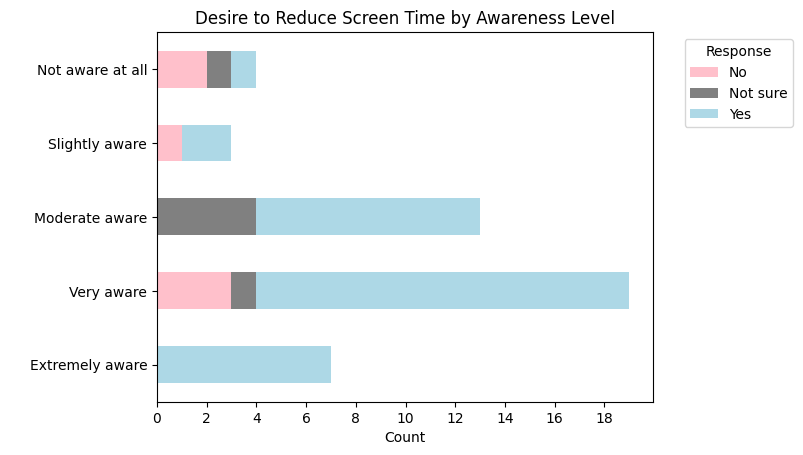

In [23]:
data = {
    'Awareness': ['Extremely aware', 'Moderate aware', 'Not aware at all', 'Slightly aware', 'Very aware'],
    'No': [0, 0, 2, 1, 3],
    'Not sure': [0, 4, 1, 0, 1],
    'Yes': [7, 9, 1, 2, 15]
}
df = pd.DataFrame(data)
df.set_index('Awareness', inplace=True)
colors = {'Yes': 'lightblue', 'No': 'pink', 'Not sure': 'gray'}
order = ['Extremely aware', 'Very aware', 'Moderate aware', 'Slightly aware', 'Not aware at all']
plt.figure(figsize=(10, 6))
ax = df.loc[order].plot(kind='barh', stacked=True, color=[colors[col] for col in df.columns])

plt.title('Desire to Reduce Screen Time by Awareness Level')
plt.xlabel('Count')
plt.ylabel(' ')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(False)
plt.show()

In [24]:
# Investigate association between awareness level and desire to reduce screen time 

# Null Hypothesis =  There is no association between awareness level and the desire to reduce 
# screen time among the surveyed individuals.

# Alternative Hypothesis = There is a significant association between awareness level and the desire
# to reduce screen time among the surveyed individuals.


from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_screentime['Awareness'], df_screentime['Desire_to_Reduce_Screen_Time'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant association between awareness level and the desire to reduce screen time.")
else:
    print("There is no significant association between awareness level and the desire to reduce screen time.")


Chi-Square statistic: 19.13137254901961
P-value: 0.014172636728218262
There is a significant association between awareness level and the desire to reduce screen time.


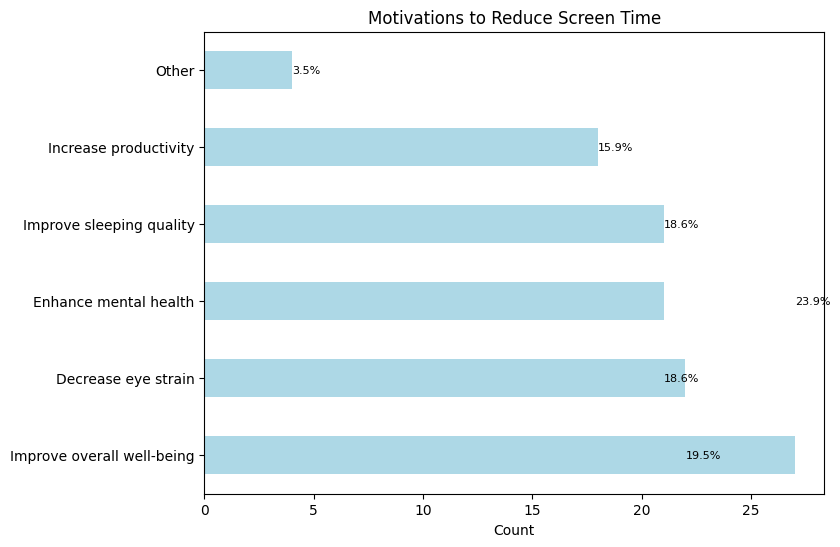

In [37]:
df_screentime = pd.read_excel('new_screentime.xlsx') 

motivations = df_screentime['Motivations_to_Reduce_Screen_Time'].str.split(', ', expand=True).stack()
motivations_df = pd.get_dummies(motivations).groupby(level=0).sum()
motivations_df.columns = motivations_df.columns.where(~motivations_df.columns.str.contains('Other'), 'Other')

plt.figure(figsize=(8, 6))  # Adjust the figure size here
ax = motivations_df.sum().sort_values(ascending=False).plot(kind='barh', color='lightblue')

plt.title('Motivations to Reduce Screen Time')
plt.xlabel('Count')
plt.ylabel('')
plt.grid(False)

total_motivations = motivations_df.sum().sum()
for i, v in enumerate(motivations_df.sum()):
    percentage = '{:.1%}'.format(v / total_motivations)
    ax.text(v, i, f'{percentage}', va='center', fontsize=8, color='black')

plt.show()



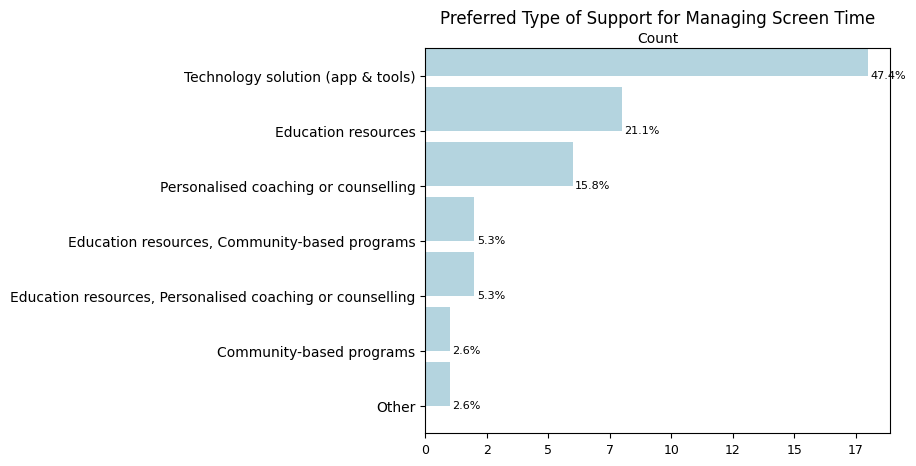

In [34]:
data = pd.read_excel('new_screentime.xlsx')

data['Preferred_Support_Type'] = data['Preferred_Support_Type'].replace({
    'Technology solution (app': 'Technology solution',
    'Technology solution (tools)': 'Technology solution',
    'Other (please specify):': 'Other'
})

data['Preferred_Support_Type'] = data['Preferred_Support_Type'].apply(
    lambda x: 'Technology solution (app & tools)' if pd.notna(x) and 'Technology solution' in x else x
)

plt.figure(figsize=(6, 5))
support_counts = data['Preferred_Support_Type'].value_counts().astype(int)
ax = sns.barplot(x=support_counts, y=support_counts.index, color='lightblue', orient='h', align='center')

plt.title('Preferred Type of Support for Managing Screen Time')
plt.xlabel('Count')
plt.ylabel('')

ax.xaxis.set_label_position('top')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=10)

total_supports = support_counts.sum()
for i, v in enumerate(support_counts):
    percentage = '{:.1%}'.format(v / total_supports)
    ax.text(v + 0.1, i, percentage, va='center', fontsize=8, color='black')

plt.show()


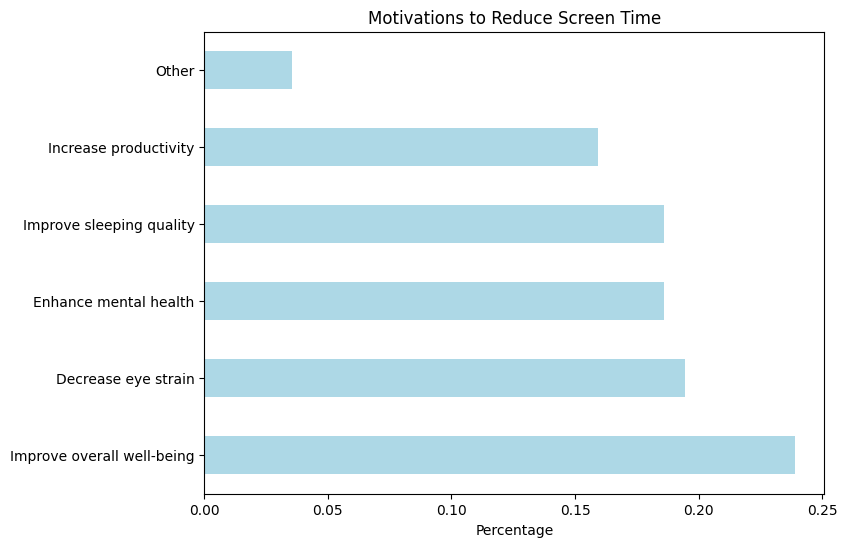

In [42]:
df_screentime = pd.read_excel('new_screentime.xlsx') 

motivations = df_screentime['Motivations_to_Reduce_Screen_Time'].str.split(', ', expand=True).stack()
motivations_df = pd.get_dummies(motivations).groupby(level=0).sum()
motivations_df.columns = motivations_df.columns.where(~motivations_df.columns.str.contains('Other'), 'Other')

plt.figure(figsize=(8, 6))
ax = (motivations_df.sum() / motivations_df.sum().sum()).sort_values(ascending=False).plot(kind='barh', color='lightblue')

plt.title('Motivations to Reduce Screen Time')
plt.xlabel('Percentage')
plt.ylabel('')
plt.grid(False)
plt.show()


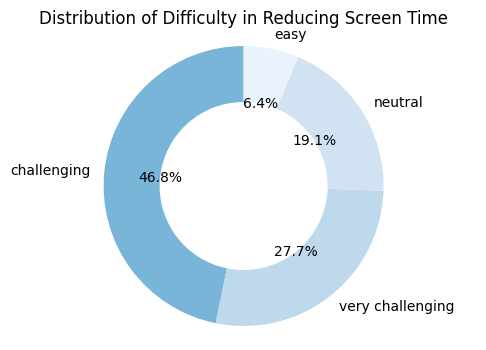

In [27]:

plt.figure(figsize=(6, 4))

difficulty_series = df_screentime['Difficulty_in_Reducing_Screen_Time'].str.split(',').explode()
difficulty_series = difficulty_series.str.strip().str.lower()

custom_order = ['very challenging', 'challenging', 'neutral', 'easy']
difficulty_counts = difficulty_series.value_counts()

total_responses = difficulty_counts.sum()
percentage_series = (difficulty_counts / total_responses) * 100
colors = plt.cm.Blues(percentage_series / 100)
plt.pie(percentage_series, labels=difficulty_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=colors, wedgeprops=dict(width=0.4), textprops={'fontsize':10})

centre_circle = plt.Circle((0, 0), 0.2, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Distribution of Difficulty in Reducing Screen Time')
plt.axis('equal')
plt.show()



In [45]:
# There are 2 missing value in average screen time. I will use median to replace the null value. 
# df_screentime['Avg_hours'].fillna(df_screentime['Avg_hours'].median(), inplace=True)


<Figure size 1000x800 with 0 Axes>

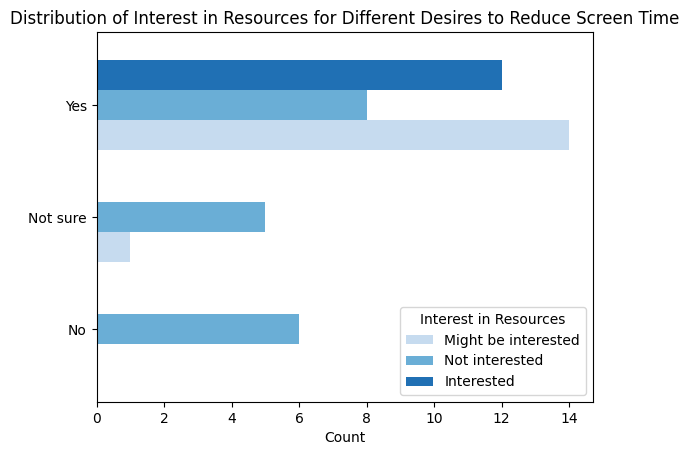

In [46]:
data = pd.read_excel('new_screentime.xlsx')
count_df = data.groupby(['Desire_to_Reduce_Screen_Time', 'Interest_in_Resources']).size().unstack()
light_blue_palette = sns.color_palette("Blues", n_colors=len(data['Interest_in_Resources'].unique()))

plt.figure(figsize=(10, 8))
ax = count_df.plot(kind='barh', color=light_blue_palette, width=0.8)

plt.title('Distribution of Interest in Resources for Different Desires to Reduce Screen Time')
plt.ylabel('')
plt.xlabel('Count')

legend_mapping = {'Yes': 'Interested', 'Maybe': 'Might be interested', 'No': 'Not interested'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [legend_mapping[label] for label in labels], title='Interest in Resources')

plt.grid(False, axis='both')
plt.show()


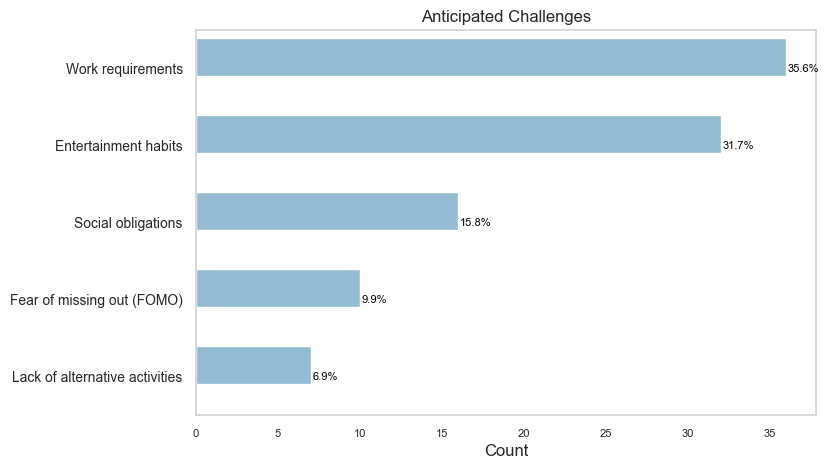

In [301]:
# anticipate challenge

data = pd.read_excel('new_screentime.xlsx')
data_split = data['Anticipated_Challenges'].str.split(',').explode().str.strip()
light_blue_color = sns.color_palette("Blues", as_cmap=False)[2]

plt.figure(figsize=(8, 5))
ax = sns.countplot(y=data_split, color=light_blue_color, order=data_split.value_counts().index, height=0.5)

plt.title('Anticipated Challenges')
plt.xlabel('Count')
plt.ylabel('')
plt.grid(False, axis='both')

total_challenges = data_split.count()
for i, v in enumerate(data_split.value_counts()):
    percentage = '{:.1%}'.format(v / total_challenges)
    ax.text(v + 0.1, i, percentage, va='center', fontsize=8, color='black')

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=10)

plt.show()


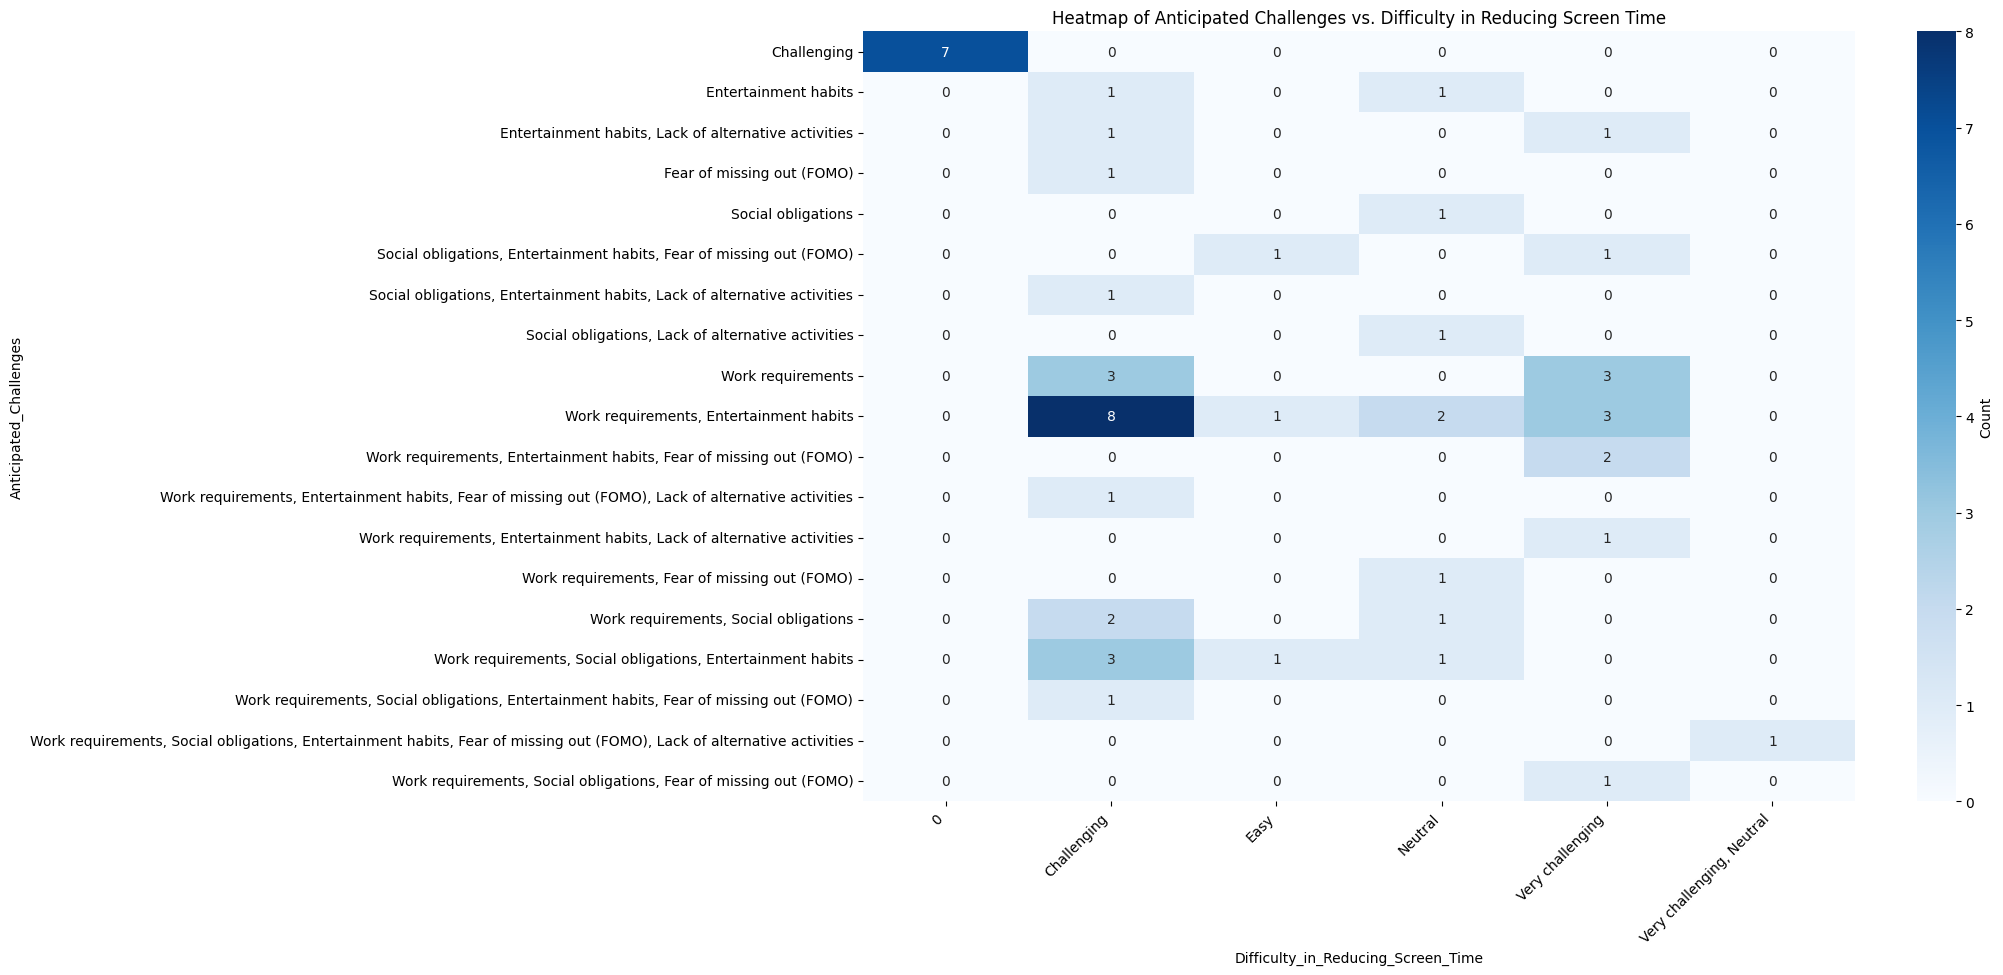

In [89]:
data['Anticipated_Challenges'] = data['Anticipated_Challenges'].replace({'very challenging': 'Challenging'})

if 'challenging' not in data['Anticipated_Challenges'].unique():
    new_row = pd.DataFrame({'Anticipated_Challenges': ['Challenging'], 'Difficulty_in_Reducing_Screen_Time': [0]})
    data = pd.concat([data, new_row], ignore_index=True)

cross_tab = pd.crosstab(data['Anticipated_Challenges'], 
                        data['Difficulty_in_Reducing_Screen_Time'])

plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', 
                      cbar_kws={'label': 'Count'}, 
                      xticklabels=True, yticklabels=True)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.title('Heatmap of Anticipated Challenges vs. Difficulty in Reducing Screen Time')
plt.show()


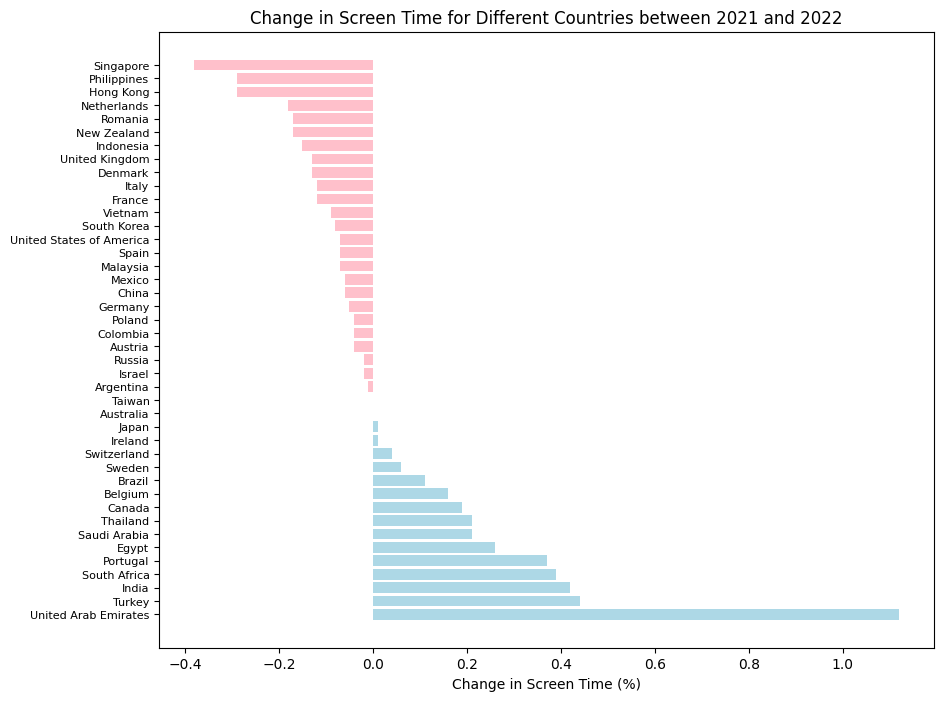

In [91]:
countries = ["United Arab Emirates", "Turkey", "India", "South Africa", "Portugal", 
             "Egypt", "Saudi Arabia", "Thailand", "Canada", "Belgium", 
             "Brazil", "Sweden", "Switzerland", "Ireland", "Japan", 
             "Australia", "Taiwan", "Argentina", "Israel", "Russia", 
             "Austria", "Colombia", "Poland", "Germany", "China", 
             "Mexico", "Malaysia", "Spain", "United States of America", 
             "South Korea", "Vietnam", "France", "Italy", "Denmark", 
             "United Kingdom", "Indonesia", "New Zealand", "Romania", 
             "Netherlands", "Hong Kong", "Philippines", "Singapore"]

change_in_screen_time = [1.12, 0.44, 0.42, 0.39, 0.37, 0.26, 0.21, 0.21, 0.19, 0.16,
                         0.11, 0.06, 0.04, 0.01, 0.01, 0.0, 0.0, -0.01, -0.02, -0.02, 
                         -0.04, -0.04, -0.04, -0.05, -0.06, -0.06, -0.07, -0.07, -0.07, 
                         -0.08, -0.09, -0.12, -0.12, -0.13, -0.13, -0.15, -0.17, -0.17, 
                         -0.18, -0.29, -0.29, -0.38]

plt.figure(figsize=(10, 8))
plt.barh(countries, change_in_screen_time, color=['lightblue' if val >= 0 else 'pink' for val in change_in_screen_time])
plt.xlabel('Change in Screen Time (%)')
plt.title('Change in Screen Time for Different Countries between 2021 and 2022')
plt.yticks(fontsize=8)
plt.grid(False, axis='both') 
plt.show()


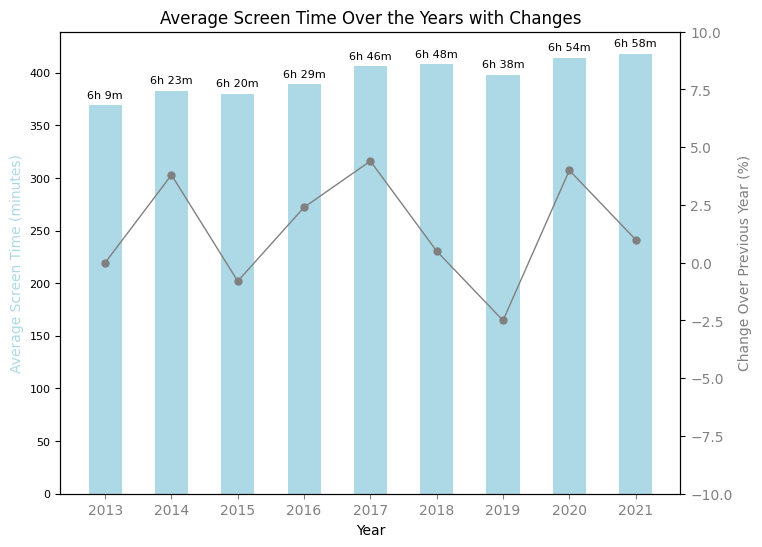

In [70]:


years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
screen_time = [369, 383, 380, 389, 406, 408, 398, 414, 418]  # Convert hours and minutes to minutes
change_percentage = [0, 3.8, -0.8, 2.4, 4.4, 0.5, -2.5, 4, 1]

fig, ax1 = plt.subplots(figsize=(8, 6))

bar_color = 'lightblue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Screen Time (minutes)', color=bar_color)

for i, v in enumerate(screen_time):
    ax1.text(i, v + 5, f'{v // 60}h {v % 60}m', ha='center', va='bottom', color='black', fontsize=8)

ax1.bar(years, screen_time, color=bar_color, width=0.5)
ax1.tick_params(axis='y', labelcolor='black', labelsize=8)  

ax2 = ax1.twinx()
line_color = 'gray'
ax2.set_ylabel('Change Over Previous Year (%)', color=line_color)
ax2.plot(years, change_percentage, color=line_color, marker='o', linewidth=1, markersize=5)  # Adjust marker size here
ax2.tick_params(axis='y', labelcolor=line_color)
ax2.set_ylim(-10, 10)  # Adjust the scale to -10% to 10%

ax1.tick_params(axis='x', colors='gray')
ax2.tick_params(axis='x', colors='gray')

plt.title('Average Screen Time Over the Years with Changes')
plt.show()


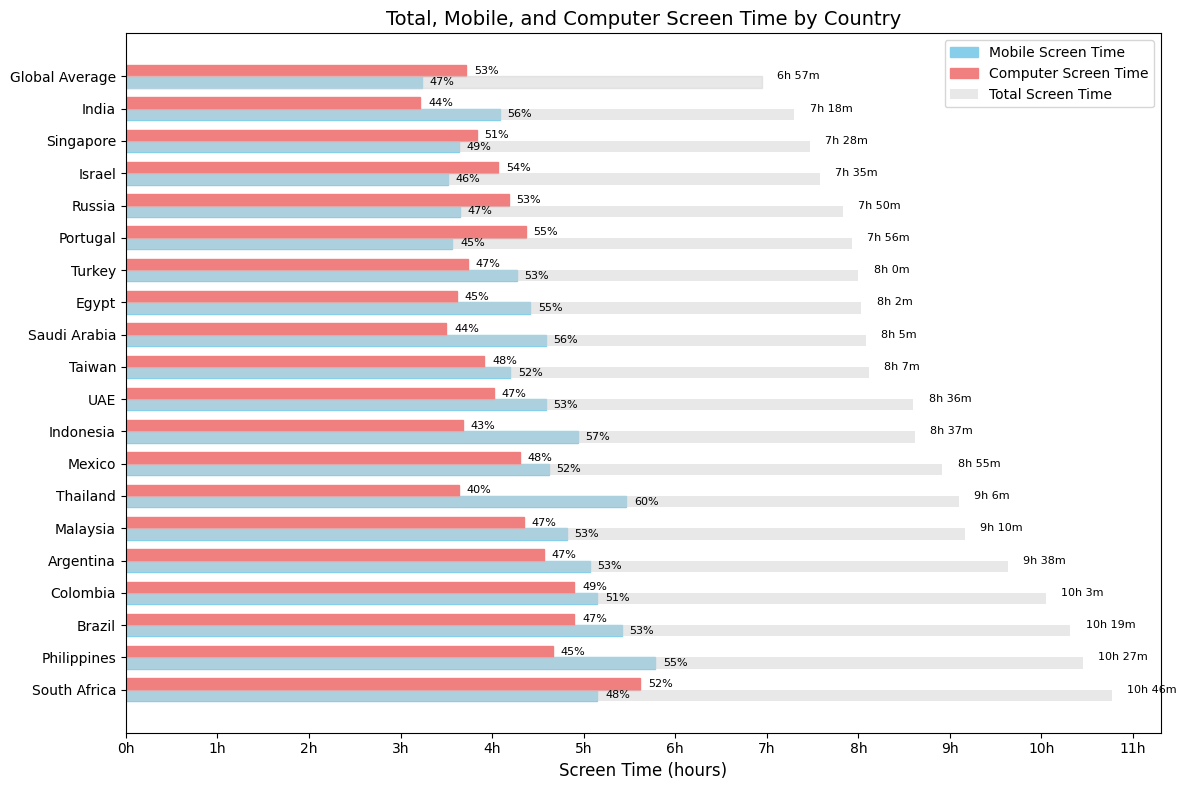

In [44]:

countries = ['South Africa', 'Philippines', 'Brazil', 'Colombia', 'Argentina', 'Malaysia', 'Thailand', 'Mexico', 'Indonesia',
             'UAE', 'Taiwan', 'Saudi Arabia', 'Egypt', 'Turkey', 'Portugal', 'Russia', 'Israel', 'Singapore', 'India', 'Global Average']

total_screen_time = [10*60 + 46, 10*60 + 27, 10*60 + 19, 10*60 + 3, 9*60 + 38, 9*60 + 10, 9*60 + 6, 8*60 + 55, 8*60 + 37, 8*60 + 36,
                     8*60 + 7, 8*60 + 5, 8*60 + 2, 8*60, 7*60 + 56, 7*60 + 50, 7*60 + 35, 7*60 + 28, 7*60 + 18, 6*60 + 57]

mobile_screen_time = [5*60 + 9, 5*60 + 47, 5*60 + 25, 5*60 + 9, 5*60 + 4, 4*60 + 49, 5*60 + 28, 4*60 + 37, 4*60 + 56, 4*60 + 35,
                      4*60 + 12, 4*60 + 35, 4*60 + 25, 4*60 + 16, 3*60 + 34, 3*60 + 39, 3*60 + 31, 3*60 + 38, 4*60 + 5, 3*60 + 14]

computer_screen_time = [5*60 + 37, 4*60 + 40, 4*60 + 54, 4*60 + 54, 4*60 + 34, 4*60 + 21, 3*60 + 38, 4*60 + 18, 3*60 + 41, 4*60 + 1,
                         3*60 + 55, 3*60 + 30, 3*60 + 37, 3*60 + 44, 4*60 + 22, 4*60 + 11, 4*60 + 4, 3*60 + 50, 3*60 + 13, 3*60 + 43]

mobile_percentage = [48, 55, 53, 51, 53, 53, 60, 52, 57, 53, 52, 56, 55, 53, 45, 47, 46, 49, 56, 47]

computer_percentage = [52, 45, 47, 49, 47, 47, 40, 48, 43, 47, 48, 44, 45, 47, 55, 53, 54, 51, 44, 53, 53]

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(countries))

bar1 = ax.barh(index - bar_width/2, mobile_screen_time, bar_width, label='Mobile Screen Time', color='skyblue')
bar2 = ax.barh(index + bar_width/2, computer_screen_time, bar_width, label='Computer Screen Time', color='lightcoral')
bar3 = ax.barh(index - bar_width/2, total_screen_time, bar_width, label='Total Screen Time', color='lightgray', alpha=0.5)

for i in range(len(countries)):
    bar1[i].set_color('skyblue')
    bar2[i].set_color('lightcoral')

global_average_index = countries.index('Global Average')
bar1[global_average_index].set_color('skyblue')
bar2[global_average_index].set_color('lightcoral')
bar3[global_average_index].set_color('lightgray')

ax.set_yticks(index)
ax.set_yticklabels(countries, fontsize=10)
ax.set_xticks(np.arange(0, max(max(mobile_screen_time), max(computer_screen_time), max(total_screen_time)) + 61, 60))
ax.set_xticklabels([f'{int(x/60)}h' for x in ax.get_xticks()])
ax.set_xlabel('Screen Time (hours)', fontsize=12)
ax.set_title('Total, Mobile, and Computer Screen Time by top  Country', fontsize=14)
ax.legend()

for i, (mobile, computer) in enumerate(zip(mobile_screen_time, computer_screen_time)):
    ax.text(mobile + 5, index[i] - bar_width/2, f'{mobile_percentage[i]}%', ha='left', va='center', color='black', fontsize=8)
    ax.text(computer + 5, index[i] + bar_width/2, f'{computer_percentage[i]}%', ha='left', va='center', color='black', fontsize=8)

for i, total in enumerate(total_screen_time):
    ax.text(total + 10, index[i], f'{int(total/60)}h {total%60}m', ha='left', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

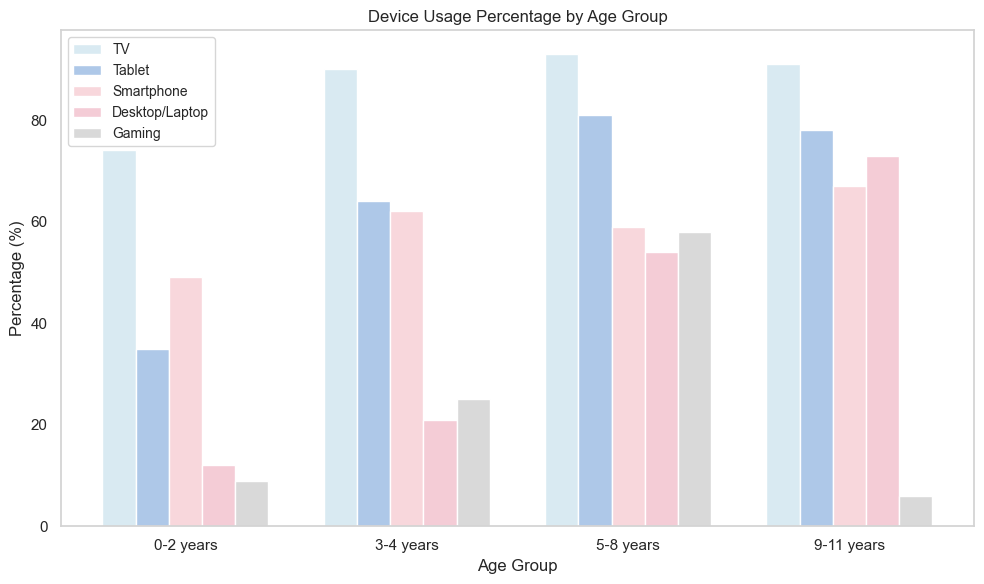

In [197]:
ages = ['0-2 years', '3-4 years', '5-8 years', '9-11 years']
tv_percentage = [74, 90, 93, 91]
tablet_percentage = [35, 64, 81, 78]
smartphone_percentage = [49, 62, 59, 67]
desktop_laptop_percentage = [12, 21, 54, 73]
gaming_percentage = [9, 25, 58, 6]
bar_width = 0.15
index = np.arange(len(ages))

light_pink = '#f8d7dc'
dark_pink = '#f4ccd6'
light_blue = '#d9eaf2'
dark_blue = '#aec8e8'
gray_tone = '#d9d9d9'

fig, ax = plt.subplots(figsize=(10, 6))
bar_tv = ax.bar(index - 2 * bar_width, tv_percentage, bar_width, label='TV', color=light_blue)
bar_tablet = ax.bar(index - bar_width, tablet_percentage, bar_width, label='Tablet', color=dark_blue)
bar_smartphone = ax.bar(index, smartphone_percentage, bar_width, label='Smartphone', color=light_pink)
bar_desktop_laptop = ax.bar(index + bar_width, desktop_laptop_percentage, bar_width, label='Desktop/Laptop', color=dark_pink)
bar_gaming = ax.bar(index + 2 * bar_width, gaming_percentage, bar_width, label='Gaming', color=gray_tone)

ax.set_xlabel('Age Group')
ax.set_xticks(index)
ax.set_xticklabels(ages)
ax.set_ylabel('Percentage (%)')
ax.set_title('Device Usage Percentage by Age Group')
ax.legend(fontsize='small')

plt.tight_layout()
plt.show()